# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

Exemplo

In [1]:
import torch
from torch import nn
from torchvision import models

# Imagem aleatória para ilustração
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

Exemplo

In [2]:
def max_grad(model):
    """Máximo valor de gradiente de cada parâmetro."""

    stats = {}
    # model.named_parameters() retorna os nomes e respectivos parâmetros do
    # modelo
    for param_name, param in model.named_parameters():
        grad = param.grad
        g_max = grad.max()
        stats[param_name] = {'g_max':g_max.item()}

    return stats

# Aplica o modelo
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

max_grad(model)

{'conv1.weight': {'g_max': 0.0005961215356364846},
 'bn1.weight': {'g_max': 0.0007489544223062694},
 'bn1.bias': {'g_max': 0.00012911198427900672},
 'layer1.0.conv1.weight': {'g_max': 0.0001985053822863847},
 'layer1.0.bn1.weight': {'g_max': 0.00027445872547104955},
 'layer1.0.bn1.bias': {'g_max': 0.00021405497682280838},
 'layer1.0.conv2.weight': {'g_max': 0.0001802331826183945},
 'layer1.0.bn2.weight': {'g_max': 0.0004803804331459105},
 'layer1.0.bn2.bias': {'g_max': 8.647492359159514e-05},
 'layer1.1.conv1.weight': {'g_max': 0.00011688518861774355},
 'layer1.1.bn1.weight': {'g_max': 0.00029347414965741336},
 'layer1.1.bn1.bias': {'g_max': 0.0002250951511086896},
 'layer1.1.conv2.weight': {'g_max': 0.00012080195301678032},
 'layer1.1.bn2.weight': {'g_max': 0.00032778538297861814},
 'layer1.1.bn2.bias': {'g_max': 0.00015336582146119326},
 'layer2.0.conv1.weight': {'g_max': 0.0001826139778131619},
 'layer2.0.bn1.weight': {'g_max': 0.00038885732647031546},
 'layer2.0.bn1.bias': {'g_max'

# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

### Resolução 

**1.** Função que recebe como entrada uma rede neural e retorna um dicionário contendo como chave o nome do parametro do modelo e o maior e menor valor dos parâmetros, bem como dos gradientes dos parêmetros.

In [3]:
import torch
from torch import nn
from torchvision import models
import matplotlib.pyplot as plt
import modelstats 
import numpy as np

In [4]:
seed = 42
torch.manual_seed(seed)
#np.random.seed(seed)

# Criação de um modelo e cálculo dos gradientes como no notebook original
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

In [5]:
def get_model_stats(model):
    """Retorna estatísticas dos parâmetros de um modelo neural.
    
    Para cada parâmetro, retorna o maior e menor valor do parâmetro
    e o maior e menor valor do gradiente do parâmetro.
    """
    stats = {}
    for param_name, param in model.named_parameters():
        # Valores do parâmetro
        param_max = param.max().item()
        param_min = param.min().item()
        
        # Valores do gradiente
        if param.grad is not None:
            grad_max = param.grad.max().item()
            grad_min = param.grad.min().item()
        else:
            grad_max = None
            grad_min = None
        
        stats[param_name] = {
            'param_max': param_max,
            'param_min': param_min,
            'grad_max': grad_max,
            'grad_min': grad_min
        }
    
    return stats

In [6]:
# Passa a imagem pelo modelo para calcular os scores
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

# Obtém as estatísticas dos parâmetros
stats = get_model_stats(model)

# Exibe as estatísticas
# for param, stat in stats.items():
#     print(f"{param}: {stat}")
# Exibe as estatísticas organizadas por linhas
# for param, stat in stats.items():
#     print(f"{param}:")
#     print(f"  param_max: {stat['param_max']}")
#     print(f"  param_min: {stat['param_min']}")
#     print(f"  grad_max: {stat['grad_max']}")
#     print(f"  grad_min: {stat['grad_min']}")
#     print()  # Adiciona uma linha em branco entre cada conjunto de estatísticas

**2.** Função que recebe o dicionário e retorna o valor máximo e mínimo dos parâmetros e gradientes dos parâmetros

In [7]:
def get_overall_stats(stats):
    """Retorna o menor e maior valor dentre todos os parâmetros e gradientes.

    Args:
        stats (dict): Dicionário com estatísticas dos parâmetros e gradientes.

    Returns:
        dict: Dicionário com os menores e maiores valores.
    """
    # Inicializa variáveis para armazenar os valores mínimos e máximos
    overall_param_min = float('inf')
    overall_param_max = float('-inf')
    overall_grad_min = float('inf')
    overall_grad_max = float('-inf')
    
    for _,values in stats.items():
        # Atualiza os valores mínimos e máximos dos parâmetros
        overall_param_min = min(overall_param_min, values['param_min'])
        overall_param_max = max(overall_param_max, values['param_max'])
        
        # Atualiza os valores mínimos e máximos dos gradientes, se disponíveis
        if values['grad_min'] is not None:
            overall_grad_min = min(overall_grad_min, values['grad_min'])
        if values['grad_max'] is not None:
            overall_grad_max = max(overall_grad_max, values['grad_max'])
    
    return overall_param_min, overall_param_max, overall_grad_min, overall_grad_max
    
    
def get_four_stats(model):
    stats=get_model_stats(model)
    return get_overall_stats(stats)

### Análise das imagens aleatórias geradas.

In [8]:
# #  overall_statseed = 42
# # torch.manual_seed(seed)
# # #np.random.seed(seed)

# # # Função para criar e plotar um tensor aleatório
# # def plot_random_tensor(batch_size, channels, height, width):
# #     # Cria um tensor aleatório
# #     x = torch.rand(batch_size, channels, height, width)
    
# #     # Converte o tensor para um formato que o Matplotlib entende (numpy array)
# #     x_np = x.permute(0, 2, 3, 1).cpu().numpy()
    
# #     # Plota as imagens
# #     _, axes = plt.subplots(1, batch_size, figsize=(15, 15))
# #     for i, ax in enumerate(axes):
# #         ax.imshow(x_np[i])
# #         ax.axis('off')def get_overall_stats(stats):
#     """Retorna o menor e maior valor dentre todos os parâmetros e gradientes.

#     Args:
#         stats (dict): Dicionário com estatísticas dos parâmetros e gradientes.

#     Returns:
#         dict: Dicionário com os menores e maiores valores.
#     """
#     # Inicializa variáveis para armazenar os valores mínimos e máximos
#     overall_param_min = float('inf')
#     overall_param_max = float('-inf')
#     overall_grad_min = float('inf')
#     overall_grad_max = float('-inf')
    
#     for _,values in stats.items():
#         # Atualiza os valores mínimos e máximos dos parâmetros
#         overall_param_min = min(overall_param_min, values['param_min'])
#         overall_param_max = max(overall_param_max, values['param_max'])
        
#         # Atualiza os valores mínimos e máximos dos gradientes, se disponíveis
#         if values['grad_min'] is not None:
#             overall_grad_min = min(overall_grad_min, values['grad_min'])
#         if values['grad_max'] is not None:
#             overall_grad_max = max(overall_grad_max, values['grad_max'])
    
#     return overall_param_min, overall_param_max, overall_grad_min, overall_grad_max
    
    
# def get_four_stats(model):
#     stats=get_model_stats(model)
#     return get_overall_stats(stats)
# # width = 8  # Largura da imagem

# # # Plotar as imagens
# # #plot_random_tensor(batch_size, channels, height, width)



IndentationError: unexpected indent (2115704750.py, line 18)

**3.** 

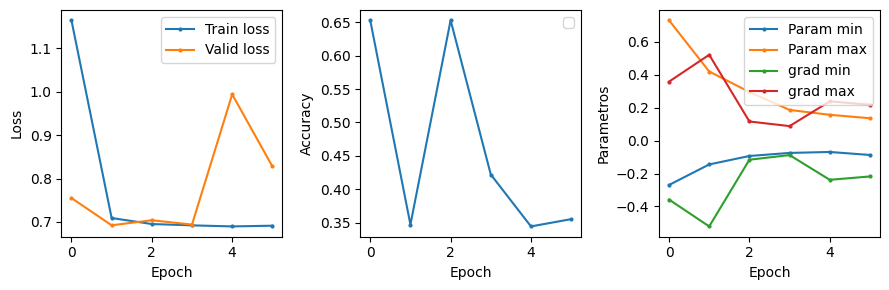

In [9]:
import train

params = {
    #'bs':64,
    'bs':8,
    'num_epochs':6,
    'lr':0.01,
    'weight_decay':1e-2,
    'resize_size':16,  # Tamanho das imagens de treinamento
    'seed':0
    # 'overall_stats':get_four_stats
}
model = models.resnet18()
# Modifica a última camada do modelo para classificar em 2 classes
model.fc = nn.Linear(model.fc.in_features, 2)
ds_train, ds_valid, logger = train.train(model, **params)
# Cada época demora em torno de 6.1 segundos em uma RTX3080 Ti

In [ ]:
print(len(ds_train), len(ds_valid))

show_img(img)

5880 1469


1


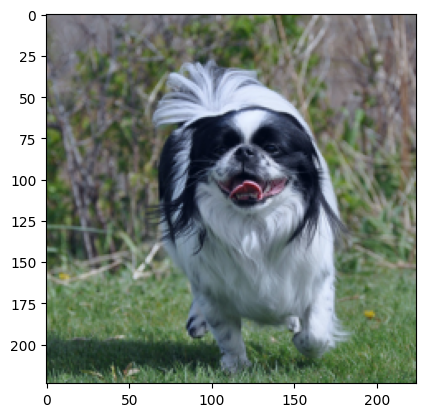

In [ ]:
img, label = ds_valid[1000]

plt.imshow(img)
print(label)

gato


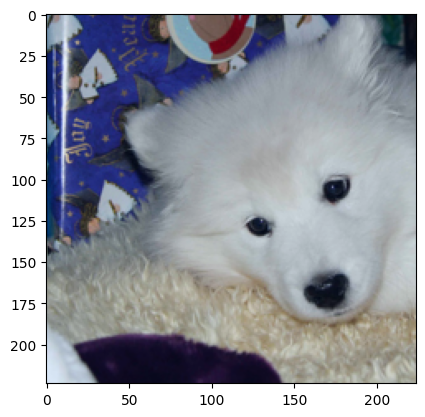

In [ ]:
img, label = ds_valid[20]
img = img.unsqueeze(0)
img = img.to('cuda')
res = model(img)
animal = torch.argmax(res)

def trata_imagem(img: torch.Tensor) -> np.ndarray:
    # remove dimensao do batch
    img = img[0]
    
    # trata a imagem
    img -= img.min()
    img /= img.max()
    img *= 255
    img = img.to(torch.uint8)
    img = img.swapaxes(0, 1).swapaxes(1, 2)
    
    if img.is_cuda:
        img = img.detach().cpu()
    else:
        img = img.detach()
    
    return img.numpy()

# animal = 'gato' if animal==1 else 'cachorro'
if animal == 1:
    animal = 'gato'
else:
    animal = 'cahorro'

img = trata_imagem(img)
print(animal)
plt.imshow(img)